# Analyzing borrowers’ risk of defaulting

Your project is to prepare a report for a bank’s loan division. You’ll need to find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

Your report will be considered when building the **credit score** of a potential customer. The **credit score** is used to evaluate the ability of a potential borrower to repay their loan.

[In this notebook you're provided with hints and brief instructions and thinking prompts. Don't ignore them as they are designed to equip you with the structure for the project and will help you analyze what you're doing on a deeper level. Before submitting your project, make sure you remove all hints and descriptions provided to you. Instead, make this report look as if you're sending it to your teammates to demonstrate your findings - they shouldn't know you had some external help from us! To help you out, we've placed the hints you should remove in square brackets.]

[Before you dive into analyzing your data, explain the purposes of the project and hypotheses you're going to test.]

## Open the data file and have a look at the general information. 

[Start with importing the libraries and loading the data. You may realise that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [826]:
# Loading all the libraries
import pandas as pd

# Load the data
data = pd.read_csv('/datasets/credit_scoring_eng.csv')


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the family
- `days_employed` - work experience in days
- `dob_years` - client's age in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - marital status
- `family_status_id` - marital status identifier
- `gender` - gender of the client
- `income_type` - type of employment
- `debt` - was there any debt on loan repayment
- `total_income` - monthly income
- `purpose` - the purpose of obtaining a loan

[Now let's explore our data. You'll want to see how many columns and rows it has, look at a few rows to check for potential issues with the data.]

In [827]:
# Let's see how many rows and columns our dataset has
data.shape
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [828]:
# let's print the first N rows
print(data.head(20))


    children  days_employed  dob_years            education  education_id  \
0          1   -8437.673028         42    bachelor's degree             0   
1          1   -4024.803754         36  secondary education             1   
2          0   -5623.422610         33  Secondary Education             1   
3          3   -4124.747207         32  secondary education             1   
4          0  340266.072047         53  secondary education             1   
5          0    -926.185831         27    bachelor's degree             0   
6          0   -2879.202052         43    bachelor's degree             0   
7          0    -152.779569         50  SECONDARY EDUCATION             1   
8          2   -6929.865299         35    BACHELOR'S DEGREE             0   
9          0   -2188.756445         41  secondary education             1   
10         2   -4171.483647         36    bachelor's degree             0   
11         0    -792.701887         40  secondary education             1   

[Describe what you see and notice in your printed data sample. Are there any issues that may need further investigation and changes?]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Same values appear to be implicit duplicates. We need to make sure that all the data is in the same format.
Another issue is that we have negative or non-proportional values for days employed. There is no logical reasoning to this issue.

In [829]:
# Get info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


[Are there missing values across all columns or just a few? Briefly describe what you see in 1-2 sentences.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We see that he have missing values of equal occurences for days_employed and total_income.
While we could (logically) assume that if you haven't been employed then you wouldn't have any income, we need to check if these missing values appear in the same row.

In [830]:
# Let's look in the filtered table at the the first column with missing data
filtered_data = data[data['days_employed'].isna()]
print(filtered_data.head(10))
print(filtered_data.shape)

    children  days_employed  dob_years            education  education_id  \
12         0            NaN         65  secondary education             1   
26         0            NaN         41  secondary education             1   
29         0            NaN         63  secondary education             1   
41         0            NaN         50  secondary education             1   
55         0            NaN         54  secondary education             1   
65         0            NaN         21  secondary education             1   
67         0            NaN         52    bachelor's degree             0   
72         1            NaN         32    bachelor's degree             0   
82         2            NaN         50    bachelor's degree             0   
83         0            NaN         52  secondary education             1   

        family_status  family_status_id gender    income_type  debt  \
12  civil partnership                 1      M        retiree     0   
26        

[Do missing values seem symmetric? Can we be sure in this assumption? Explain your thoughts briefly in this section. You may probably want to conduct further investigations, and count the missing values in all the rows with missing values to confirm the the missing samples are of the same size.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
First, we filtered by the first column with missing values. We then printed the first 10 rows to get an indication of whether or not there was symmetry between the values. It appeared to be the case, but we cannot tell for sure.

In [831]:
# Let's apply multiple conditions for filtering data and look at the number of rows in the filtered table.
filtered_data = data[data['days_employed'].isna() & data['total_income'].isna()]
filtered_data.shape


(2174, 12)

**Intermediate conclusion**

[Does the number of rows in the filtered table match the number of missing values? What conclusion can we make from this?]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Yes. The conclusion is that there is a perfect symmetry between the rows with missing values. If you do not work, you do not have any income.
</div>
[Calculate the percentage of the missing values compared to the whole dataset. Is it a considerably large piece of data? If so, you may want to fill the missing values. To do that, firstly we should consider whether the missing data could be due to the specific client characteristic, such as employment type or something else. You will need to decide which characteristic *you* think might be the reason. Secondly, we should check whether there's any dependence missing values have on the value of other indicators with the columns with identified specific client characteristic.]


[Explain your next steps and how they correlate with the conclusions you made so far.]

In [832]:
percentage = f'{filtered_data.shape[0]/data.shape[0]:.2%}'
print(percentage)

10.10%


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
After calculating the percentgae of missing values, it is safe to say that 10.10% is significant.

To go over each column/characteristic in our filtered data DataFrame, we will use a for loop on all columns, and using the count method to see if we have any value that correlates with our missing values.

In [833]:
# Let's investigate clients who do not have data on identified characteristic 
# and the column with the missing values
for column in filtered_data.columns:
    print(filtered_data.groupby([column])[column].count())

children
-1        3
 0     1439
 1      475
 2      204
 3       36
 4        7
 5        1
 20       9
Name: children, dtype: int64
Series([], Name: days_employed, dtype: int64)
dob_years
0     10
19     1
20     5
21    18
22    17
23    36
24    21
25    23
26    35
27    36
28    57
29    50
30    58
31    65
32    37
33    51
34    69
35    64
36    63
37    53
38    54
39    51
40    66
41    59
42    65
43    50
44    44
45    50
46    48
47    59
48    46
49    50
50    51
51    50
52    53
53    44
54    55
55    48
56    54
57    56
58    56
59    34
60    39
61    38
62    38
63    29
64    37
65    20
66    20
67    16
68     9
69     5
70     3
71     5
72     2
73     1
Name: dob_years, dtype: int64
education
BACHELOR'S DEGREE        23
Bachelor's Degree        25
PRIMARY EDUCATION         1
Primary Education         1
SECONDARY EDUCATION      67
SOME COLLEGE              7
Secondary Education      65
Some College              7
bachelor's degree       496
primary educat

In [834]:
# Checking distribution
for column in filtered_data.columns:
    print(filtered_data.groupby([column])[column].count())


children
-1        3
 0     1439
 1      475
 2      204
 3       36
 4        7
 5        1
 20       9
Name: children, dtype: int64
Series([], Name: days_employed, dtype: int64)
dob_years
0     10
19     1
20     5
21    18
22    17
23    36
24    21
25    23
26    35
27    36
28    57
29    50
30    58
31    65
32    37
33    51
34    69
35    64
36    63
37    53
38    54
39    51
40    66
41    59
42    65
43    50
44    44
45    50
46    48
47    59
48    46
49    50
50    51
51    50
52    53
53    44
54    55
55    48
56    54
57    56
58    56
59    34
60    39
61    38
62    38
63    29
64    37
65    20
66    20
67    16
68     9
69     5
70     3
71     5
72     2
73     1
Name: dob_years, dtype: int64
education
BACHELOR'S DEGREE        23
Bachelor's Degree        25
PRIMARY EDUCATION         1
Primary Education         1
SECONDARY EDUCATION      67
SOME COLLEGE              7
Secondary Education      65
Some College              7
bachelor's degree       496
primary educat

[Describe your findings here.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
**Possible reasons for missing values in data**
We thought that a dominant value in one of the columns in the  filtered data would lead to a possible cause.
</div>
[Propose your ideas on why you think the values might be missing. Do you think they are missing randomly or there are any patterns?]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We think that the value '0' in the debt column is the cause for the missing data.
</div>

[Let's start checking whether the missing values are random.]

In [835]:
# Checking the distribution in the whole dataset

for column in ['debt', 'children', 'education', 'family_status', 'gender']:
    print(data.groupby([column])[column].count())

debt
0    19784
1     1741
Name: debt, dtype: int64
children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: children, dtype: int64
education
BACHELOR'S DEGREE        274
Bachelor's Degree        268
GRADUATE DEGREE            1
Graduate Degree            1
PRIMARY EDUCATION         17
Primary Education         15
SECONDARY EDUCATION      772
SOME COLLEGE              29
Secondary Education      711
Some College              47
bachelor's degree       4718
graduate degree            4
primary education        250
secondary education    13750
some college             668
Name: education, dtype: int64
family_status
civil partnership     4177
divorced              1195
married              12380
unmarried             2813
widow / widower        960
Name: family_status, dtype: int64
gender
F      14236
M       7288
XNA        1
Name: gender, dtype: int64


**Intermediate conclusion**

[Is the distribution in the original dataset similar to the distribution of the filtered table? What does that mean for us?]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Yes, there are similar ratios between our filtered data and the original dataset. It means that we cannot draw conclusions until we understand our data better.
</div>
[If you think we can't make any conclusions yet, let's investigate our dataset further. Let's think about other reasons that could lead to data missing and check if we can find any patterns that may lead us to thinking that the missing values are not random. Because this is your work, this is section is optional.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
The glaring issue is negative values in the days_employed column. We need to check if this is just an entry error. 

In [836]:
# Check for other reasons and patterns that could lead to missing values



**Intermediate conclusion**

[Can we finally confirm that missing values are accidental? Check for anything else that you think might be important here.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We couldn't draw conclusion from the missing values. Instead, we should look into the values themselves, specifically the negative ones in days employed.

In [837]:
# Checking for other patterns - explain which
de = data['days_employed']
print(pd.to_datetime(de))

0       1969-12-31 23:59:59.999991563
1       1969-12-31 23:59:59.999995976
2       1969-12-31 23:59:59.999994377
3       1969-12-31 23:59:59.999995876
4       1970-01-01 00:00:00.000340266
                     ...             
21520   1969-12-31 23:59:59.999995471
21521   1970-01-01 00:00:00.000343937
21522   1969-12-31 23:59:59.999997887
21523   1969-12-31 23:59:59.999996888
21524   1969-12-31 23:59:59.999998016
Name: days_employed, Length: 21525, dtype: datetime64[ns]


**Conclusions**

[Did you find any patterns? How did you come to this conclusion?]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
No pattern were found. The ratios in the filtered and original dataset are similar.
    </div>

[Explain how you will address the missing values. Consider the categories in which values are missing.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
The only columns with missing values are days_employed and total_income. To get a clearer idea of the data, we must first put them all in the same format, and hope for entry errors and not bad data.
</div>
[Briefly plan your next steps for transforming data. You will probably need to address different types of issues: duplicates, different registers, incorrect artifacts, and missing values.]

## Data transformation

[Let's go through each column to see what issues we may have in them.]

[Begin with removing duplicates and fixing educational information if required.]

In [838]:
# Let's see all values in education column to check if and what spellings will need to be fixed
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [839]:
# Fix the registers if required
data['education'] = data['education'].str.lower()
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

In [840]:
# Checking all the values in the column to make sure we fixed them
data['education'].unique()


array(["bachelor's degree", 'secondary education', 'some college',
       'primary education', 'graduate degree'], dtype=object)

[Check the data the `children` column]

In [841]:
# Let's see the distribution of values in the `children` column
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

[Are there any strange things in the column? If yes, how high is the percentage of problematic data? How could they have occurred? Make a decision on what you will do with this data and explain you reasoning.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
There are several strange things: a value of -1, a value of 20 in the middle of the order.
These were most likely entry errors. And while not large in volume, we could certainly hypothesize that -1 is actually 1, and 20 is possibly 2, and proceed with replacing said values.

In [842]:
# [fix the data based on your decision]
data['children'] = data['children'].replace(20, 2)
data['children'] = data['children'].replace(-1, 1)

In [843]:
# Checking the `children` column again to make sure it's all fixed
data['children'].value_counts()


0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

[Check the data in the `days_employed` column. Firstly think about what kind of issues could there be and what you may want to check and how you will do it.]

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Before any preprocessing of the days_employed column, I calculated both the mean and median values of the column.
    We can see that both values are not helpful to conduct further analysis.
    So, per our tutor, we will not proceed with any <b>significant</b> analysis of these values.
    
    

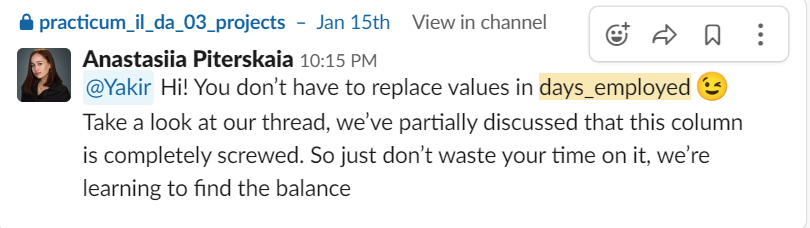

In [844]:
mean_days_employed = data['days_employed'].mean()
print(mean_days_employed)
median_days_employed = data['days_employed'].median()
print(median_days_employed)

63046.49766147338
-1203.369528770489


In [845]:
# Find problematic data in `days_employed`, if they exist, and calculate the percentage
negative_days = data[data['days_employed']<0]['days_employed'].count()

print(negative_days)
percentage_days_employed = f'{negative_days/data.shape[0]:.2%}'
print(percentage_days_employed)

15906
73.90%


[If the amount of problematic data is high, it could've been due to some technical issues. We may probably want to propose the most obvious reason why it could've happened and what the correct data might've been, as we can't drop these problematic rows.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We see that nearly 3/4 of the data is problematic, most likely due to entry error. There cannot be a negative value for days employed - either you work or you don't. 
Other issues are grotesquely large values of days employed - no one works for 1,000 years.

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Let's try and examine whether negative values are the error. To remove the negative values, we will use the abs() function.

In [846]:
# Address the problematic values, if they exist
absolute_days_employed = abs(data['days_employed'])

absolute_days_employed.head(10)



0      8437.673028
1      4024.803754
2      5623.422610
3      4124.747207
4    340266.072047
5       926.185831
6      2879.202052
7       152.779569
8      6929.865299
9      2188.756445
Name: days_employed, dtype: float64

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We now see that the negative value wasn't the only problm in the data. 

In [847]:
# Check the result - make sure it's fixed
large_days_employed = data[data['days_employed']>365*50]['days_employed']
large_days_employed.count()



3445

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We see that we have a significant number of entries of people who have worked more than 50 years. This makes zero sense.
We can therefore infer that the days_employed column is corrupted, so we cannot perform proper analysis based on it. We must talk to the client and/or engineering team.

In [848]:
max_possible_days_employed = 365*50
for index, row in data[data['days_employed']>max_possible_days_employed].iterrows():
    data.loc[index,'days_employed'] = max_possible_days_employed
for index, row in data[data['days_employed']<0].iterrows():
    data.loc[index,'days_employed'] = max_possible_days_employed
data['days_employed'] = data['days_employed'].fillna(value=max_possible_days_employed)
data[data['days_employed']>0]['days_employed'].value_counts()

18250.0    21525
Name: days_employed, dtype: int64

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    It turns out, all entries for days_employed were corrupt - they were either neagtive or ridiculously abnormal.
    Therefore, we defined a maximum value by which to repalce not only these values, but also the missing ones.
    Unfortunately, this results in a uniform column, which renders it unusable for further analysis.

[Let's now look at the client's age and whether there are any issues there. Again, think about what can data can be strange in this column, i.e. what cannot be someone's age.]

In [849]:
# Check the `dob_years` for suspicious values and count the percentage
print(data['dob_years'].value_counts())

suspicious_dob_years = data[data['dob_years']<=0]['dob_years'].count()
print(suspicious_dob_years)

percentage_dob_years = f'{suspicious_dob_years/data.shape[0]:.2%}'
print(percentage_dob_years)

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
66    183
22    183
67    167
21    111
0     101
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64
101
0.47%


[Decide what you'll do with the problematic values and explain why.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We see that we have 101 instances of dob_years = 0, which is roughly 0.5% of the entire data. In the grand overview, this won't schew the data much, so we drop it from our data.

In [850]:
# Address the issues in the `dob_years` column, if they exist
data = data.drop(data[data['dob_years'] == 0].index)

In [851]:
# Check the result - make sure it's fixed
data['dob_years'].value_counts()

35    617
40    609
41    607
34    603
38    598
42    597
33    581
39    573
31    560
36    555
44    547
29    545
30    540
48    538
37    537
50    514
43    513
32    510
49    508
28    503
45    497
27    493
56    487
52    484
47    480
54    479
46    475
58    461
57    460
53    459
51    448
59    444
55    443
26    408
60    377
25    357
61    355
62    352
63    269
64    265
24    264
23    254
65    194
22    183
66    183
67    167
21    111
68     99
69     85
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

[Now let's check the `family_status` column. See what kind of values there are and what problems you may need to address.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
It does not appear that there are any problematic values in the family_status column.

In [852]:
# Let's see the values for the column
print(data['family_status'].value_counts())


married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64


In [853]:
# Address the problematic values in `family_status`, if they exist



In [854]:
# Check the result - make sure it's fixed


[Now let's check the `gender` column. See what kind of values there are and what problems you may need to address]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We have one case of XNA, but it is inconsequential to our data. And in the spirit of inclusion and diversity, perhaps this entry does not identify itself as F or M. 
What we can observe, however, is that the ratio between women and men is nearly 2:1.  

In [855]:
# Let's see the values in the column
print(data['gender'].value_counts())

F      14164
M       7259
XNA        1
Name: gender, dtype: int64


In [856]:
# Address the problematic values, if they exist

In [857]:
# Check the result - make sure it's fixed



[Now let's check the `income_type` column. See what kind of values there are and what problems you may need to address]

In [858]:
# Let's see the values in the column
print(data['income_type'].value_counts())

employee                       11064
business                        5065
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64


In [859]:
# Address the problematic values, if they exist

In [860]:
# Check the result - make sure it's fixed



[Now let's see if we have any duplicates in our data. If we do, you'll need to decide what you will do with them and explain why.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We see that we have 71 cases of duplicated data. However, we cannot immidiately assume that these are indeed the same entry - they could be different people with the same characteristics. 

In [861]:
# Checking duplicates
duplicated_data = data[data.duplicated()]
(duplicated_data.head(10))


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
2849,0,18250.0,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family
3290,0,18250.0,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
4182,1,18250.0,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony
4851,0,18250.0,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony
5557,0,18250.0,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding
6312,0,18250.0,30,secondary education,1,married,0,M,employee,0,NaN,building a real estate
7808,0,18250.0,57,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
7921,0,18250.0,64,bachelor's degree,0,civil partnership,1,F,retiree,0,NaN,having a wedding
7938,0,18250.0,71,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding
8583,0,18250.0,58,bachelor's degree,0,unmarried,4,F,retiree,0,NaN,supplementary education


In [862]:
# Address the duplicates, if they exist

In [863]:
# Last check whether we have any duplicates


In [864]:
# Check the size of the dataset that you now have after your first manipulations with it

[Describe your new dataset: briefly say what's changed and what's the percentage of the changes, if there were any.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Since there are no unique identifiers for each user, the supposed duplicates are acceptable as seperate entries.

# Working with missing values

[To speed up working with some data, you may want to work with dictionaries for some values, where IDs are provided. Explain why and which dictionaries you will work with.]
To make sure that our values fully correlate, we will do the following:
1+2: check the value counts for the column and column_id to get the pairings we think will make up our dictionary.
3: We create a for loop that will go over our assumed dictionary entries to confirm our hypothesis.

In [865]:
# Find the dictionaries
print(data['family_status_id'].value_counts())
print(data['family_status'].value_counts())

for value in [(0, 'married'), (1, 'civil partnership'), (4, 'unmarried'), (3, 'divorced'), (2, 'widow / widower')]:
    data_family_status = data.loc[(data['family_status_id'] == value[0]) & (data['family_status'] == value[1])]
    print(data_family_status.shape)
    
family_status_dict = {
    0 : 'married', 
    1 : 'civil partnership',
    2 : 'widow / widower', 
    3 : 'divorced', 
    4 : 'unmarried'
}    

print(data['education_id'].value_counts())
print(data['education'].value_counts())

for value in [(0, "bachelor's degree"), (1, 'secondary education'), (4, 'graduate degree'), (3, 'primary education'), (2, 'some college')]:
    data_education = data.loc[(data['education_id'] == value[0]) & (data['education'] == value[1])]
    print(data_education.shape)

    
education_dict = {
    0 : "bachelor's degree", 
    1 : 'secondary education',
    2 : 'some college', 
    3 : 'primary education', 
    4 : 'graduate degree'
}    




0    12331
1     4156
4     2797
3     1185
2      955
Name: family_status_id, dtype: int64
married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64
(12331, 12)
(4156, 12)
(2797, 12)
(1185, 12)
(955, 12)
1    15169
0     5225
2      742
3      282
4        6
Name: education_id, dtype: int64
secondary education    15169
bachelor's degree       5225
some college             742
primary education        282
graduate degree            6
Name: education, dtype: int64
(5225, 12)
(15169, 12)
(6, 12)
(282, 12)
(742, 12)


### Restoring missing values in `total_income`

[Briefly state which column(s) have values missing that you need to address. Explain how you will fix them.]
We found two columns with missing values - days_employed and total_income. We saw that days_employed is corrupted, so if we choose to fill in missing values we will do so total_income.

[Start with addressing total income missing values. Create and age category for clients. Create a new column with the age category. This strategy can help with calculating values for the total income.]


In [866]:
# Let's write a function that calculates the age category
def assign_age_category(dob_years):
    if dob_years<=24:
        return '24 and under'
    if 25<=dob_years<=26:
        return '25-26'
    if 27<=dob_years<=28:
        return '27-28'
    if 29<=dob_years<=33:
        return '29-33'
    if 34<=dob_years<=39:
        return '34-39'
    if 40<=dob_years<=42:
        return '40-42'
    if 43<=dob_years<=47:
        return '43-47'
    if 48<=dob_years<=50:
        return '48-50'
    if 51<=dob_years<=55:
        return '51-55'
    if 56<=dob_years<=59:
        return '56-59'
    if 60<=dob_years<=62:
        return '60-62'
    if 63<=dob_years<=64:
        return '63-64'
    if 65<=dob_years<=67:
        return '65-67'
    if dob_years>=68:
        return '68+'





In [867]:
# Test if the function works


In [868]:
# Creating new column based on function
data['age_category'] = data['dob_years'].apply(assign_age_category)


In [869]:
# Checking how values in the new column
data['age_category'].value_counts()

34-39           3483
29-33           2736
43-47           2512
51-55           2313
56-59           1852
40-42           1813
48-50           1560
60-62           1084
27-28            996
24 and under     877
25-26            765
65-67            544
63-64            534
68+              355
Name: age_category, dtype: int64

[Think about the factors on which income usually depends. Eventually, you will want to find out whether you should use mean or median values for replacing missing values. To make this decision you will probably want to look at the distribution of the factors you identified as impacting one's income.]

[Create a table that only has data without missing values. This data will be used to restore the missing values.]

In [870]:
# Create a table without missing values and print a few of its rows to make sure it looks fine
clean_data = data[['age_category', 'income_type', 'education', 'total_income',]].dropna()
clean_data.isna().sum()

age_category    0
income_type     0
education       0
total_income    0
dtype: int64

In [871]:
# Look at the mean values for income based on your identified factors
mean_income_age_category = clean_data.groupby('age_category').mean('total_income')
print(mean_income_age_category)
mean_income_type = clean_data.groupby('income_type').mean('total_income')
print(mean_income_type)
mean_income_education = clean_data.groupby('education').mean('total_income')
print(mean_income_education)

              total_income
age_category              
24 and under  22703.351103
25-26         25243.943867
27-28         27355.753821
29-33         27680.007478
34-39         28617.692423
40-42         28714.388376
43-47         28552.784508
48-50         27690.982261
51-55         26156.618683
56-59         25186.969373
60-62         23627.785171
63-64         24351.680103
65-67         22523.583629
68+           20092.058355
                             total_income
income_type                              
business                     32397.357125
civil servant                27361.316126
employee                     25824.679592
entrepreneur                 79866.103000
paternity / maternity leave   8612.661000
retiree                      21939.310393
student                      15712.260000
unemployed                   21014.360500
                     total_income
education                        
bachelor's degree    33172.428387
graduate degree      27960.024667
primary educ

In [872]:
# Look at the median values for income based on your identified factors
median_income_age_category = clean_data.groupby('age_category').median('total_income')
print(median_income_age_category)
median_income_type = clean_data.groupby('income_type').median('total_income')
print(median_income_type)
median_income_education = clean_data.groupby('education').median('total_income')
print(median_income_education)

              total_income
age_category              
24 and under    20572.2090
25-26           22983.7950
27-28           24194.6330
29-33           24173.0810
34-39           24872.4750
40-42           24971.0500
43-47           24595.8680
48-50           24412.3980
51-55           22339.7660
56-59           21969.0785
60-62           20629.9590
63-64           20834.1775
65-67           18726.0940
68+             18004.9405
                             total_income
income_type                              
business                       27564.8930
civil servant                  24083.5065
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18969.1490
student                        15712.2600
unemployed                     21014.3605
                     total_income
education                        
bachelor's degree      28054.5310
graduate degree        25161.5835
primary educ

[Repeat such comparisons for multiple factors. Make sure you consider different aspects and explain your thinking process.]



[Make a decision on what characteristics define income most and whether you will use a median or a mean. Explain why you made this decision]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
I performed mean and median calculations for age group, income type, and education. I believe that these factors are what drives income most: 
1. Better education leads to better paying jobs.
2. Certain job types pay more than others (for example: entrepreneur vs civil servant).
3. Most of the working people are in a certain age range, so it would make sense that there is a correlation between age and income.

As for mean or median: we will use the mean, as there don't seem to be significant outliers. When we attempt to fill the missing values, we will have to use the mean of the aformentioned means we calculated above.


In [873]:
new_data_grouped = data.groupby(['education', 'age_category', 'income_type'])['total_income'].mean()

In [874]:
new_data_grouped_dict=pd.Series(new_data_grouped).to_dict()
new_data_grouped_dict

{("bachelor's degree", '24 and under', 'business'): 28125.568907692297,
 ("bachelor's degree", '24 and under', 'civil servant'): 29873.948666666667,
 ("bachelor's degree", '24 and under', 'employee'): 23316.75211458334,
 ("bachelor's degree", '24 and under', 'student'): 15712.26,
 ("bachelor's degree", '25-26', 'business'): 30036.836700000014,
 ("bachelor's degree", '25-26', 'civil servant'): 25803.720405405405,
 ("bachelor's degree", '25-26', 'employee'): 26228.25663247861,
 ("bachelor's degree", '25-26', 'retiree'): 34394.128,
 ("bachelor's degree", '27-28', 'business'): 36866.1390280374,
 ("bachelor's degree", '27-28', 'civil servant'): 28351.020500000006,
 ("bachelor's degree", '27-28', 'employee'): 29968.85232335329,
 ("bachelor's degree", '27-28', 'entrepreneur'): 79866.103,
 ("bachelor's degree", '29-33', 'business'): 36940.67035517242,
 ("bachelor's degree", '29-33', 'civil servant'): 29133.74054545454,
 ("bachelor's degree", '29-33', 'employee'): 29571.5001081081,
 ("bachelor'

In [875]:
new_data_grouped_dict.values()

dict_values([28125.568907692297, 29873.948666666667, 23316.75211458334, 15712.26, 30036.836700000014, 25803.720405405405, 26228.25663247861, 34394.128, 36866.1390280374, 28351.020500000006, 29968.85232335329, 79866.103, 36940.67035517242, 29133.74054545454, 29571.5001081081, 39928.456, 34294.92136082474, 32030.088031249994, 35371.2158, 42178.58031972788, 30209.79344444445, 32621.59009433962, 28546.995333333336, 40849.28775879399, 33043.93488135593, 31308.788062240663, 42871.882153846156, 32435.602000000006, 41177.247017857146, 38185.216093749994, 30105.984933333337, 37776.3934375, 43567.19870000004, 32796.42658333333, 35530.43787919464, 26220.310895833332, 41010.716736842085, 29931.72547368421, 31694.249234567895, nan, 24681.422309523816, 38074.37836000001, 36447.6081, 29509.786878048773, 27606.732489361704, 45549.939066666666, 43480.4544, 36783.87533333334, 27891.48708474576, 36862.3626, 18418.054666666667, 29597.72836363636, 29794.356627118632, 35343.05000000001, 40449.0445, 31077.42

In [876]:
new_data_grouped_dict.keys()

dict_keys([("bachelor's degree", '24 and under', 'business'), ("bachelor's degree", '24 and under', 'civil servant'), ("bachelor's degree", '24 and under', 'employee'), ("bachelor's degree", '24 and under', 'student'), ("bachelor's degree", '25-26', 'business'), ("bachelor's degree", '25-26', 'civil servant'), ("bachelor's degree", '25-26', 'employee'), ("bachelor's degree", '25-26', 'retiree'), ("bachelor's degree", '27-28', 'business'), ("bachelor's degree", '27-28', 'civil servant'), ("bachelor's degree", '27-28', 'employee'), ("bachelor's degree", '27-28', 'entrepreneur'), ("bachelor's degree", '29-33', 'business'), ("bachelor's degree", '29-33', 'civil servant'), ("bachelor's degree", '29-33', 'employee'), ("bachelor's degree", '34-39', 'business'), ("bachelor's degree", '34-39', 'civil servant'), ("bachelor's degree", '34-39', 'employee'), ("bachelor's degree", '34-39', 'retiree'), ("bachelor's degree", '40-42', 'business'), ("bachelor's degree", '40-42', 'civil servant'), ("bach

In [877]:
new_data_grouped_dict

{("bachelor's degree", '24 and under', 'business'): 28125.568907692297,
 ("bachelor's degree", '24 and under', 'civil servant'): 29873.948666666667,
 ("bachelor's degree", '24 and under', 'employee'): 23316.75211458334,
 ("bachelor's degree", '24 and under', 'student'): 15712.26,
 ("bachelor's degree", '25-26', 'business'): 30036.836700000014,
 ("bachelor's degree", '25-26', 'civil servant'): 25803.720405405405,
 ("bachelor's degree", '25-26', 'employee'): 26228.25663247861,
 ("bachelor's degree", '25-26', 'retiree'): 34394.128,
 ("bachelor's degree", '27-28', 'business'): 36866.1390280374,
 ("bachelor's degree", '27-28', 'civil servant'): 28351.020500000006,
 ("bachelor's degree", '27-28', 'employee'): 29968.85232335329,
 ("bachelor's degree", '27-28', 'entrepreneur'): 79866.103,
 ("bachelor's degree", '29-33', 'business'): 36940.67035517242,
 ("bachelor's degree", '29-33', 'civil servant'): 29133.74054545454,
 ("bachelor's degree", '29-33', 'employee'): 29571.5001081081,
 ("bachelor'

In [878]:
#  Write a function that we will use for filling in missing values
def fill_missing_income(index):
    dict_key = (data.loc[index]['education'], data.loc[index]['age_category'], data.loc[index]['income_type'])
    data.loc[index,'total_income']= new_data_grouped_dict[dict_key]

for index, row in data[data['total_income'].isna()].iterrows():
    fill_missing_income(index)
    


    



In [879]:
# Check if it works

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Before running the function for the first time, I tested it and made sure that it worked.

In [880]:
# Apply it to every row


In [881]:
# Check if we got any errors
data[data['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_category
3891,1,18250.0,68,some college,2,divorced,3,F,employee,0,NaN,building a property,68+
5936,0,18250.0,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate,56-59
8142,0,18250.0,64,primary education,3,civil partnership,1,F,civil servant,0,NaN,to have a wedding,63-64


[If you've came across errors in preparing the values for missing data, it probably means there's something special about the data for the category. Give it some thought - you may want to fix some things manually, if there's enough data to find medians/means.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We found 3 instances still with missing value in total_income. Since we worked on the clean_data DataFrame, it seems that there were no such combinations of our desired key-value entries.
Depending on the age_category or, if not applicable, income_type, we will calculate the mean of the adjacent entries.

In [882]:
# Replacing missing values if there are any errors
data.loc[3891,'total_income']= new_data_grouped_dict['some college', '65-67', 'employee']
data.loc[5936,'total_income']= new_data_grouped_dict["bachelor's degree", '56-59', 'employee']
data.loc[8142,'total_income']= new_data_grouped_dict['primary education', '56-59', 'civil servant']

data[data['total_income'].isna()].sum()

children            0.0
days_employed       0.0
dob_years           0.0
education           0.0
education_id        0.0
family_status       0.0
family_status_id    0.0
gender              0.0
income_type         0.0
debt                0.0
total_income        0.0
purpose             0.0
age_category        0.0
dtype: float64

[When you think you've finished with `total_income`, check that the total number of values in this column matches the number of values in other ones.]

In [883]:
# Checking the number of entries in the columns
data.isna().sum()


children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_category        0
dtype: int64

###  Restoring values in `days_employed`

[Think about the parameters that may help you restore the missing values in this column. Eventually, you will want to find out whether you should use mean or median values for replacing missing values. You will probably conduct a research similar to the one you've done when restoring data in a previous column.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
The data in the days_employed column seems to be corrupted. Therefore, we will not proceed with any analisys of this column. Please see my previous remark regarding this issue. There is no way to work with the days_employed data.

In [884]:
# Distribution of `days_employed` medians based on your identified parameters




In [885]:
# Distribution of `days_employed` means based on your identified parameters

[Decide what you will use: means or medians. Explain why.]

In [886]:
# Let's write a function that calculates means or medians (depending on your decision) based on your identified parameter


In [887]:
# Check that the function works



In [888]:
# Apply function to the income_type



In [889]:
# Check if function worked



In [890]:
# Replacing missing values



[When you think you've finished with `total_income`, check that the total number of values in this column matches the number of values in other ones.]

In [891]:
# Check the entries in all columns - make sure we fixed all missing values

## Categorization of data

[To answer the questions and test the hypotheses, you will want to work with categorized data. Look at the questions that were posed to you and that you should answer. Think about which of the data will need to be categorized to answer these questions. Below you will find a template through which you can work your way when categorizing data. The first step-by-step processing covers the text data; the second one addresses the numerical data that needs to be categorized. You can use both or none of the suggested instructions - it's up to you.]

[Despite of how you decide to address the categorization, make sure to provide clear explanation of why you made your decision. Remember: this is your work and you make all decisions in it.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
For categorization analysis, we will take a look at the purpose, children, and total_income column.

In [892]:
# Print the values for your selected data for categorization
data['purpose'].value_counts()

wedding ceremony                            792
having a wedding                            773
to have a wedding                           769
real estate transactions                    673
buy commercial real estate                  661
buying property for renting out             651
transactions with commercial real estate    649
housing transactions                        647
purchase of the house                       641
housing                                     641
purchase of the house for my family         640
construction of own property                633
property                                    630
transactions with my real estate            630
building a real estate                      623
buy real estate                             621
building a property                         620
purchase of my own house                    619
housing renovation                          610
buy residential real estate                 604
buying my own car                       

[Let's check unique values]

In [893]:
# Check the unique values
data['purpose'].unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

[What main groups can you identify based on the unique values?]

[Based on these themes, we will probably want to categorize our data.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We can divide our purpose values into 4 groups: wedding, car, education, and real estate/housing.
We will create a new column titled purpose_category, so our analysis will be clearer.

In [894]:
# Let's write a function to categorize the data based on common topics
categories = ['wedding', 'car', 'education', 'real estate/housing']
def assign_purpose(purpose):
    if purpose in ['wedding ceremony', 'having a wedding', 'to have a wedding']:
        return 'wedding'
    if purpose in ['real estate transactions', 'buy commercial real estate', 'buying property for renting out', 
                  'transactions with commercial real estate', 'housing transactions', 'housing', 'purchase of the house',
                   'purchase of the house for my family', 'construction of own property', 'property', 
                   'transactions with my real estate', 'building a real estate', 'buy real estate', 'building a property',
                   'purchase of my own house', 'housing renovation', 'buy residential real estate']:
        return 'real estate / housing'
    if purpose in ['buying my own car', 'car', 'second-hand car purchase', 'buying a second-hand car', 'to own a car',
                  'cars', 'to buy a car', 'car purchase', 'purchase of a car']:
        return 'car'
    if purpose in ['university education', 'to get a supplementary education', 'education', 'getting an education',
                  'profile education', 'getting higher education', 'to become educated', 'going to university', 
                   'supplementary education']:
        return 'education'

In [895]:
# Create a column with the categories and count the values for them

data['purpose_category'] = data['purpose'].apply(assign_purpose)
data['purpose_category'].value_counts()

real estate / housing    10793
car                       4293
education                 4004
wedding                   2334
Name: purpose_category, dtype: int64

In [896]:
# Print the values for your selected data for categorization
data['children'].value_counts()

0    14080
1     4849
2     2117
3      328
4       41
5        9
Name: children, dtype: int64

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    For categorization of the children column, we will assign the category of have/no children.

In [897]:
# Let's write a function to categorize the data based on common topics
categories = ['have children', 'no children']
def assign_children(children):
    if children>0:
        return 'have children'
    else: return 'no children'
    
data['children_cat'] = data['children'].apply(assign_children)
data['children_cat'].value_counts()

no children      14080
have children     7344
Name: children_cat, dtype: int64

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    For categorization of the total_income column:
    1. We will create a function that will divide our total_income values into 10 intervals. This will be useful so we can understand the volumes and values of our data.
    2. We will use the pd.cut() method, divided arbitrarily into 10 intervals.

In [898]:
def create_bins(low, high, num_of_intervals):
    interval = (high-low) / num_of_intervals
    bins = [low]
    last_value = low
    for income_interval in range(num_of_intervals):
        last_value+=interval
        bins.append(last_value)
    return(bins)    
        
lowest_income = data['total_income'].min()
highest_income = data['total_income'].max()
bins=create_bins(lowest_income, highest_income, 10)

bins

data['total_income_cat'] = pd.cut(x=data['total_income'], bins=bins)
data['total_income_cat'].value_counts()

(3306.762, 39225.75]        18354
(39225.75, 75144.739]        2783
(75144.739, 111063.727]       223
(111063.727, 146982.715]       34
(146982.715, 182901.704]       15
(182901.704, 218820.692]        6
(254739.68, 290658.668]         4
(218820.692, 254739.68]         2
(326577.657, 362496.645]        2
(290658.668, 326577.657]        0
Name: total_income_cat, dtype: int64

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Using the value_counts() method, we see that most of our data in concentrated in 4 main categories. In the cell below, we will refine our pd.cut() and categorize our values.

In [899]:
bins = [3306.762, 39225.75, 75144.739, 111063.727,362496.645 ]
labels=['low', 'medium', 'high', 'oligarch']
data['total_income_cat'] = pd.cut(x=data['total_income'], bins=bins, labels=labels)

[If you decide to categorize the numerical data, you'll need to come up with the categories for it too.]

In [900]:
# Looking through all the numerical data in your selected column for categorization
reference_data = data[['total_income_cat', 'age_category', 'income_type', 'education', 'family_status', 'children', 'children_cat', 
                      'purpose_category', 'debt']]
reference_data

,total_income_cat,age_category,income_type,education,family_status,children,children_cat,purpose_category,debt
0,medium,40-42,employee,bachelor's degree,married,1,have children,real estate / housing,0
1,low,34-39,employee,secondary education,married,1,have children,car,0
2,low,29-33,employee,secondary education,married,0,no children,real estate / housing,0
3,medium,29-33,employee,secondary education,married,3,have children,education,0
4,low,51-55,retiree,secondary education,civil partnership,0,no children,wedding,0
...,...,...,...,...,...,...,...,...,...
21520,low,43-47,business,secondary education,civil partnership,1,have children,real estate / housing,0
21521,low,65-67,retiree,secondary education,married,0,no children,car,0
21522,low,34-39,employee,secondary education,civil partnership,1,have children,real estate / housing,1
21523,low,34-39,employee,secondary education,married,3,have children,car,1


# Getting summary statistics for the column

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Already performed earlier in the project.



[Decide what ranges you will use for grouping and explain why.]

In [901]:
# Creating function for categorizing into different numerical groups based on ranges



In [902]:
# Creating column with categories


In [903]:
# Count each categories values to see the distribution


## Checking the Hypotheses


**Is there a correlation between having children and paying back on time?**

In [904]:
# Check the children data and paying back on time
children_debt_data = reference_data[['children', 'debt']]
print(children_debt_data.loc[(children_debt_data['children']>0) & (children_debt_data['debt'] == 1)])
print(children_debt_data.loc[(children_debt_data['children']==0) & (children_debt_data['debt'] == 1)])
print(children_debt_data.loc[(children_debt_data['children']>0) & (children_debt_data['debt'] == 0)])
print(children_debt_data.loc[(children_debt_data['children']==0) & (children_debt_data['debt'] == 0)])



       children  debt
75            1     1
93            1     1
153           1     1
164           2     1
183           1     1
...         ...   ...
21456         2     1
21483         2     1
21515         1     1
21522         1     1
21523         3     1

[675 rows x 2 columns]
       children  debt
14            0     1
32            0     1
38            0     1
55            0     1
100           0     1
...         ...   ...
21466         0     1
21475         0     1
21486         0     1
21494         0     1
21511         0     1

[1058 rows x 2 columns]
       children  debt
0             1     0
1             1     0
3             3     0
8             2     0
10            2     0
...         ...   ...
21507         1     0
21510         2     0
21519         1     0
21520         1     0
21524         2     0

[6669 rows x 2 columns]
       children  debt
2             0     0
4             0     0
5             0     0
6             0     0
7             0     0
..

In [905]:
# Calculating default-rate based on the number of children
print(children_debt_data.groupby('children')['debt'].value_counts())
for number_of_children in range(6):
    denom = len(children_debt_data[children_debt_data['children'] == number_of_children])
    enum = len(children_debt_data.loc[(children_debt_data['children']==number_of_children) & (children_debt_data['debt'] == 1)])
    print(f'{enum/denom:.2%}')

children  debt
0         0       13022
          1        1058
1         0        4407
          1         442
2         0        1915
          1         202
3         0         301
          1          27
4         0          37
          1           4
5         0           9
Name: debt, dtype: int64
7.51%
9.12%
9.54%
8.23%
9.76%
0.00%


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    That was the analysis performed on number of children. We will now run the same tests, only this time checking whether having children at all is a driving force behind default rate.

In [906]:
children_debt_grouped = data.groupby('children_cat')['debt'].value_counts()
print(children_debt_grouped)

children_payback = children_debt_grouped['have children'][0]/children_debt_grouped['have children'].sum()
print('have children and paid back:', f'{children_payback:.2%}')
children_default = children_debt_grouped['have children'][1]/children_debt_grouped['have children'].sum()
print('have children and defaulted:', f'{children_default:.2%}')

no_children_payback = children_debt_grouped['no children'][0]/children_debt_grouped['no children'].sum()
print('have no children and paid back:', f'{no_children_payback:.2%}')
no_children_default = children_debt_grouped['no children'][1]/children_debt_grouped['no children'].sum()
print('have no children and defaulted:', f'{no_children_default:.2%}')





children_cat   debt
have children  0        6669
               1         675
no children    0       13022
               1        1058
Name: debt, dtype: int64
have children and paid back: 90.81%
have children and defaulted: 9.19%
have no children and paid back: 92.49%
have no children and defaulted: 7.51%


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    There is no correlation between having children and the ability to pay back a loan.

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    The first code cell  was ran to meet and sort the data, based on the children column. In the second code cell for this column, we grouped that data.

**Conclusion**

[Write your conclusions based on your manipulations and observations.]
In order to calculate the default rate with number of children as our variable, we looped through each number of children, and divided the number of defaultees by it.
The conclusion drawn from this data:
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
1. There is no strong correlation between number of children and paying the loan.
2. The sample size for 5 or more children is too small to be of any statistical significance.

**Is there a correlation between family status and paying back on time?**
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    First, we filtered according to each value with the appropriate logical condition. Once we understood the data, we grouped it in the code cell below.

In [907]:
# Check the family status data and paying back on time
family_status_debt_data = reference_data[['family_status', 'debt']]
family_status_debt_data.value_counts()
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='married') & (family_status_debt_data['debt'] == 0)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='married') & (family_status_debt_data['debt'] == 1)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='civil partnership') & (family_status_debt_data['debt'] == 0)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='civil partnership') & (family_status_debt_data['debt'] == 1)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='unmarried') & (family_status_debt_data['debt'] == 0)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='unmarried') & (family_status_debt_data['debt'] == 1)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='divorced') & (family_status_debt_data['debt'] == 0)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='divorced') & (family_status_debt_data['debt'] == 1)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='widow / widower') & (family_status_debt_data['debt'] == 0)])
print(family_status_debt_data.loc[(family_status_debt_data['family_status']=='widow / widower') & (family_status_debt_data['debt'] == 1)])

      family_status  debt
0           married     0
1           married     0
2           married     0
3           married     0
6           married     0
...             ...   ...
21513       married     0
21516       married     0
21518       married     0
21521       married     0
21524       married     0

[11404 rows x 2 columns]
      family_status  debt
75          married     1
93          married     1
114         married     1
124         married     1
147         married     1
...             ...   ...
21457       married     1
21475       married     1
21486       married     1
21515       married     1
21523       married     1

[927 rows x 2 columns]
           family_status  debt
4      civil partnership     0
5      civil partnership     0
8      civil partnership     0
12     civil partnership     0
17     civil partnership     0
...                  ...   ...
21505  civil partnership     0
21506  civil partnership     0
21507  civil partnership     0
21517  civil par

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    Here, we used pivot_table instead of groupby, even though we are dealing with a similar situation to the children_cat question. Since we are only pivoting with 2 columns, we randomly chose another column from the data set as our value, just so we can see the data.
    My question to you is: is this a proper way to use pivot_table? Or, when dealing with only 2 columns, we should stick to groupby?

In [908]:
reference_data
family_status_pivot = reference_data.pivot_table(index='debt', columns='family_status', values='children', aggfunc='count')
print(family_status_pivot)

for status in ['married', 'civil partnership', 'unmarried', 'divorced', 'widow / widower']:
    payback=family_status_pivot[status][0]/family_status_pivot[status].sum()
    default=family_status_pivot[status][1]/family_status_pivot[status].sum()
    print(status, 'and paid back:', f'{payback:.2%}')
    print(status, 'and default:', f'{default:.2%}')




family_status  civil partnership  divorced  married  unmarried  \
debt                                                             
0                           3770      1100    11404       2524   
1                            386        85      927        273   

family_status  widow / widower  
debt                            
0                          893  
1                           62  
married and paid back: 92.48%
married and default: 7.52%
civil partnership and paid back: 90.71%
civil partnership and default: 9.29%
unmarried and paid back: 90.24%
unmarried and default: 9.76%
divorced and paid back: 92.83%
divorced and default: 7.17%
widow / widower and paid back: 93.51%
widow / widower and default: 6.49%


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Conversely, I've kept the previos method as well, but under comment and not code.

In [909]:
# Calculating default-rate based on family status
#print(family_status_debt_data.groupby('family_status')['debt'].value_counts())
#for status in ['married', 'civil partnership', 'unmarried', 'divorced', 'widow / widower']:
    #denom = len(family_status_debt_data[family_status_debt_data['family_status'] == status])
    #enum = len(family_status_debt_data.loc[(family_status_debt_data['family_status']==status) & (family_status_debt_data['debt'] == 1)])
    #print(f'{enum/denom:.2%}')


**Conclusion**

[Write your conclusions based on your manipulations and observations.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Based on family_status, we arrive at pretty much the same conclusions from the children observations - there's isn't a strong enough correlation between a person's family status and his/her ability to pay back the loan.

**Is there a correlation between income level and paying back on time?**

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
We ran the same tests using groupby, and achieved the same results. Hooray!

In [910]:
reference_data
income_type_pivot = reference_data.pivot_table(index='debt', columns='income_type', values='children', aggfunc='count')
print(income_type_pivot)

for income_type in ['employee', 'civil servant', 'business', 'retiree', 'student', 'unemployed', 'entrepreneur', 'paternity / maternity leave']:
    payback=income_type_pivot[income_type][0]/income_type_pivot[income_type].sum()
    default=income_type_pivot[income_type][1]/income_type_pivot[income_type].sum()
    print(income_type, 'and paid back:', f'{payback:.2%}')
    print(income_type, 'and default:', f'{default:.2%}')

income_type  business  civil servant  employee  entrepreneur  \
debt                                                           
0              4690.0         1367.0   10009.0           2.0   
1               375.0           86.0    1055.0           NaN   

income_type  paternity / maternity leave  retiree  student  unemployed  
debt                                                                    
0                                    NaN   3621.0      1.0         1.0  
1                                    1.0    215.0      NaN         1.0  
employee and paid back: 90.46%
employee and default: 9.54%
civil servant and paid back: 94.08%
civil servant and default: 5.92%
business and paid back: 92.60%
business and default: 7.40%
retiree and paid back: 94.40%
retiree and default: 5.60%
student and paid back: 100.00%
student and default: nan%
unemployed and paid back: 50.00%
unemployed and default: 50.00%
entrepreneur and paid back: 100.00%
entrepreneur and default: nan%
paternity / materni

In [911]:
# Check the income level data and paying back on time
income_type_debt_data = reference_data[['income_type', 'debt']]
income_type_debt_data.value_counts()
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='employee') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='employee') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='business') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='business') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='retiree') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='retiree') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='civil servant') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='civil servant') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='entrepreneur') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='entrepreneur') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='student') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='student') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='unempoyed') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='unemployed') & (income_type_debt_data['debt'] == 1)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='paternity / maternity leave') & (income_type_debt_data['debt'] == 0)])
print(income_type_debt_data.loc[(income_type_debt_data['income_type']=='paternity / maternity leave') & (income_type_debt_data['debt'] == 1)])



      income_type  debt
0        employee     0
1        employee     0
2        employee     0
3        employee     0
7        employee     0
...           ...   ...
21506    employee     0
21510    employee     0
21513    employee     0
21519    employee     0
21524    employee     0

[10009 rows x 2 columns]
      income_type  debt
32       employee     1
38       employee     1
75       employee     1
93       employee     1
100      employee     1
...           ...   ...
21486    employee     1
21511    employee     1
21515    employee     1
21522    employee     1
21523    employee     1

[1055 rows x 2 columns]
      income_type  debt
5        business     0
6        business     0
10       business     0
33       business     0
37       business     0
...           ...   ...
21512    business     0
21514    business     0
21516    business     0
21517    business     0
21520    business     0

[4690 rows x 2 columns]
      income_type  debt
14       business     1
153      bus

In [912]:
# Calculating default-rate based on income level
print(income_type_debt_data.groupby('income_type')['debt'].value_counts())
for level in ['employee', 'civil servant', 'business', 'retiree', 'paternity / maternity leave', 'entrepreneur', 'student',
             'unemployed']:
    denom = len(income_type_debt_data[income_type_debt_data['income_type'] == level])
    enum = len(income_type_debt_data.loc[(income_type_debt_data['income_type']==level) & (income_type_debt_data['debt'] == 1)])
    print(f'{enum/denom:.2%}')

income_type                  debt
business                     0        4690
                             1         375
civil servant                0        1367
                             1          86
employee                     0       10009
                             1        1055
entrepreneur                 0           2
paternity / maternity leave  1           1
retiree                      0        3621
                             1         215
student                      0           1
unemployed                   0           1
                             1           1
Name: debt, dtype: int64
9.54%
5.92%
7.40%
5.60%
100.00%
0.00%
0.00%
50.00%


**Conclusion**

[Write your conclusions based on your manipulations and observations.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
I went with the assumption that income level refers to income_type.
The conclusions are as follows:
1. Once again, there is no strong correlation between income_type and the ability to pay off a loan.
2. We have 3 groups of small sample sizes, so we cannot make a proper analysis of these cases.

**How does credit purpose affect the default rate?**

In [913]:
# Check the percentages for default rate for each credit purpose and analyze them
purpose_category_debt_data = reference_data[['purpose_category', 'debt']]
purpose_category_debt_data.value_counts()
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='wedding') & (purpose_category_debt_data['debt'] == 0)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='wedding') & (purpose_category_debt_data['debt'] == 1)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='real estate / housing') & (purpose_category_debt_data['debt'] == 0)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='real estate / housing') & (purpose_category_debt_data['debt'] == 1)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='education') & (purpose_category_debt_data['debt'] == 0)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='education') & (purpose_category_debt_data['debt'] == 1)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='car') & (purpose_category_debt_data['debt'] == 0)])
print(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']=='car') & (purpose_category_debt_data['debt'] == 1)])


      purpose_category  debt
4              wedding     0
8              wedding     0
12             wedding     0
23             wedding     0
35             wedding     0
...                ...   ...
21495          wedding     0
21498          wedding     0
21499          wedding     0
21505          wedding     0
21506          wedding     0

[2150 rows x 2 columns]
      purpose_category  debt
32             wedding     1
55             wedding     1
230            wedding     1
322            wedding     1
619            wedding     1
...                ...   ...
20997          wedding     1
21185          wedding     1
21246          wedding     1
21274          wedding     1
21327          wedding     1

[184 rows x 2 columns]
            purpose_category  debt
0      real estate / housing     0
2      real estate / housing     0
5      real estate / housing     0
6      real estate / housing     0
9      real estate / housing     0
...                      ...   ...
21513  rea

In [914]:
# Calculating default-rate based on purpose
print(purpose_category_debt_data.groupby('purpose_category')['debt'].value_counts())
for purpose in ['wedding', 'real estate / housing', 'education', 'car']:
    denom = len(purpose_category_debt_data[purpose_category_debt_data['purpose_category'] == purpose])
    enum = len(purpose_category_debt_data.loc[(purpose_category_debt_data['purpose_category']==purpose) & (purpose_category_debt_data['debt'] == 1)])
    print(f'{enum/denom:.2%}')

purpose_category       debt
car                    0        3893
                       1         400
education              0        3634
                       1         370
real estate / housing  0       10014
                       1         779
wedding                0        2150
                       1         184
Name: debt, dtype: int64
7.88%
7.22%
9.24%
9.32%


**Conclusion**

[Write your conclusions based on your manipulations and observations.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Same observations as for previous comparisons.

# General Conclusion 

[List your conclusions in this final section. Make sure you include all your important conclusions you made that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, and possible reasons and solutions for problematic artifacts that you had to address.]

[List your conclusions regarding the posed questions here as well.]
<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
Aside from the corrupted data under the days_employed column, there is no strong conclusion to be drawn from any parameter. Either the results are too similar, or there are too many small sample/insignificant data to draw analysis from.
    All possible columns in our data do not yield any cut-throat results. Either we need more entries so that we can reach a logical conclusion behind which factors determine the ability to pay back the loan, or we need different metrics/columns by which to conduct our analysis.
